In [3]:
from wordcloud import WordCloud

import pandas as pd
import os
import matplotlib.pyplot as plt
# Define a function to plot word cloud

def plot_cloud(wordcloud, type_, name):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");
    plt.savefig(f'{type_}_{name}')
    plt.show()

In [34]:
paths = ['atheism_to_feminist']


In [45]:
def vis_word_cloud(base_path, path):
    full_path = f'{base_path}/pivots/{path}/100_bi_raw.tsv'
    pivots_df = pd.read_csv(full_path, sep='\t')
    pivots_df = pivots_df[['name', 'MI']]#
    pivots_df.set_index('name', inplace=True)
    pivots_dict = pivots_df.to_dict()

    wordcloud = WordCloud(width = 1500, height = 1000, random_state=1,
                          background_color='white',
                          collocations=False,prefer_horizontal=0.99, max_words=30)

    gen_wordcloud = wordcloud.generate_from_frequencies(pivots_dict['MI'])

    plot_cloud(gen_wordcloud, base_path, path)


atheism_to_feminist


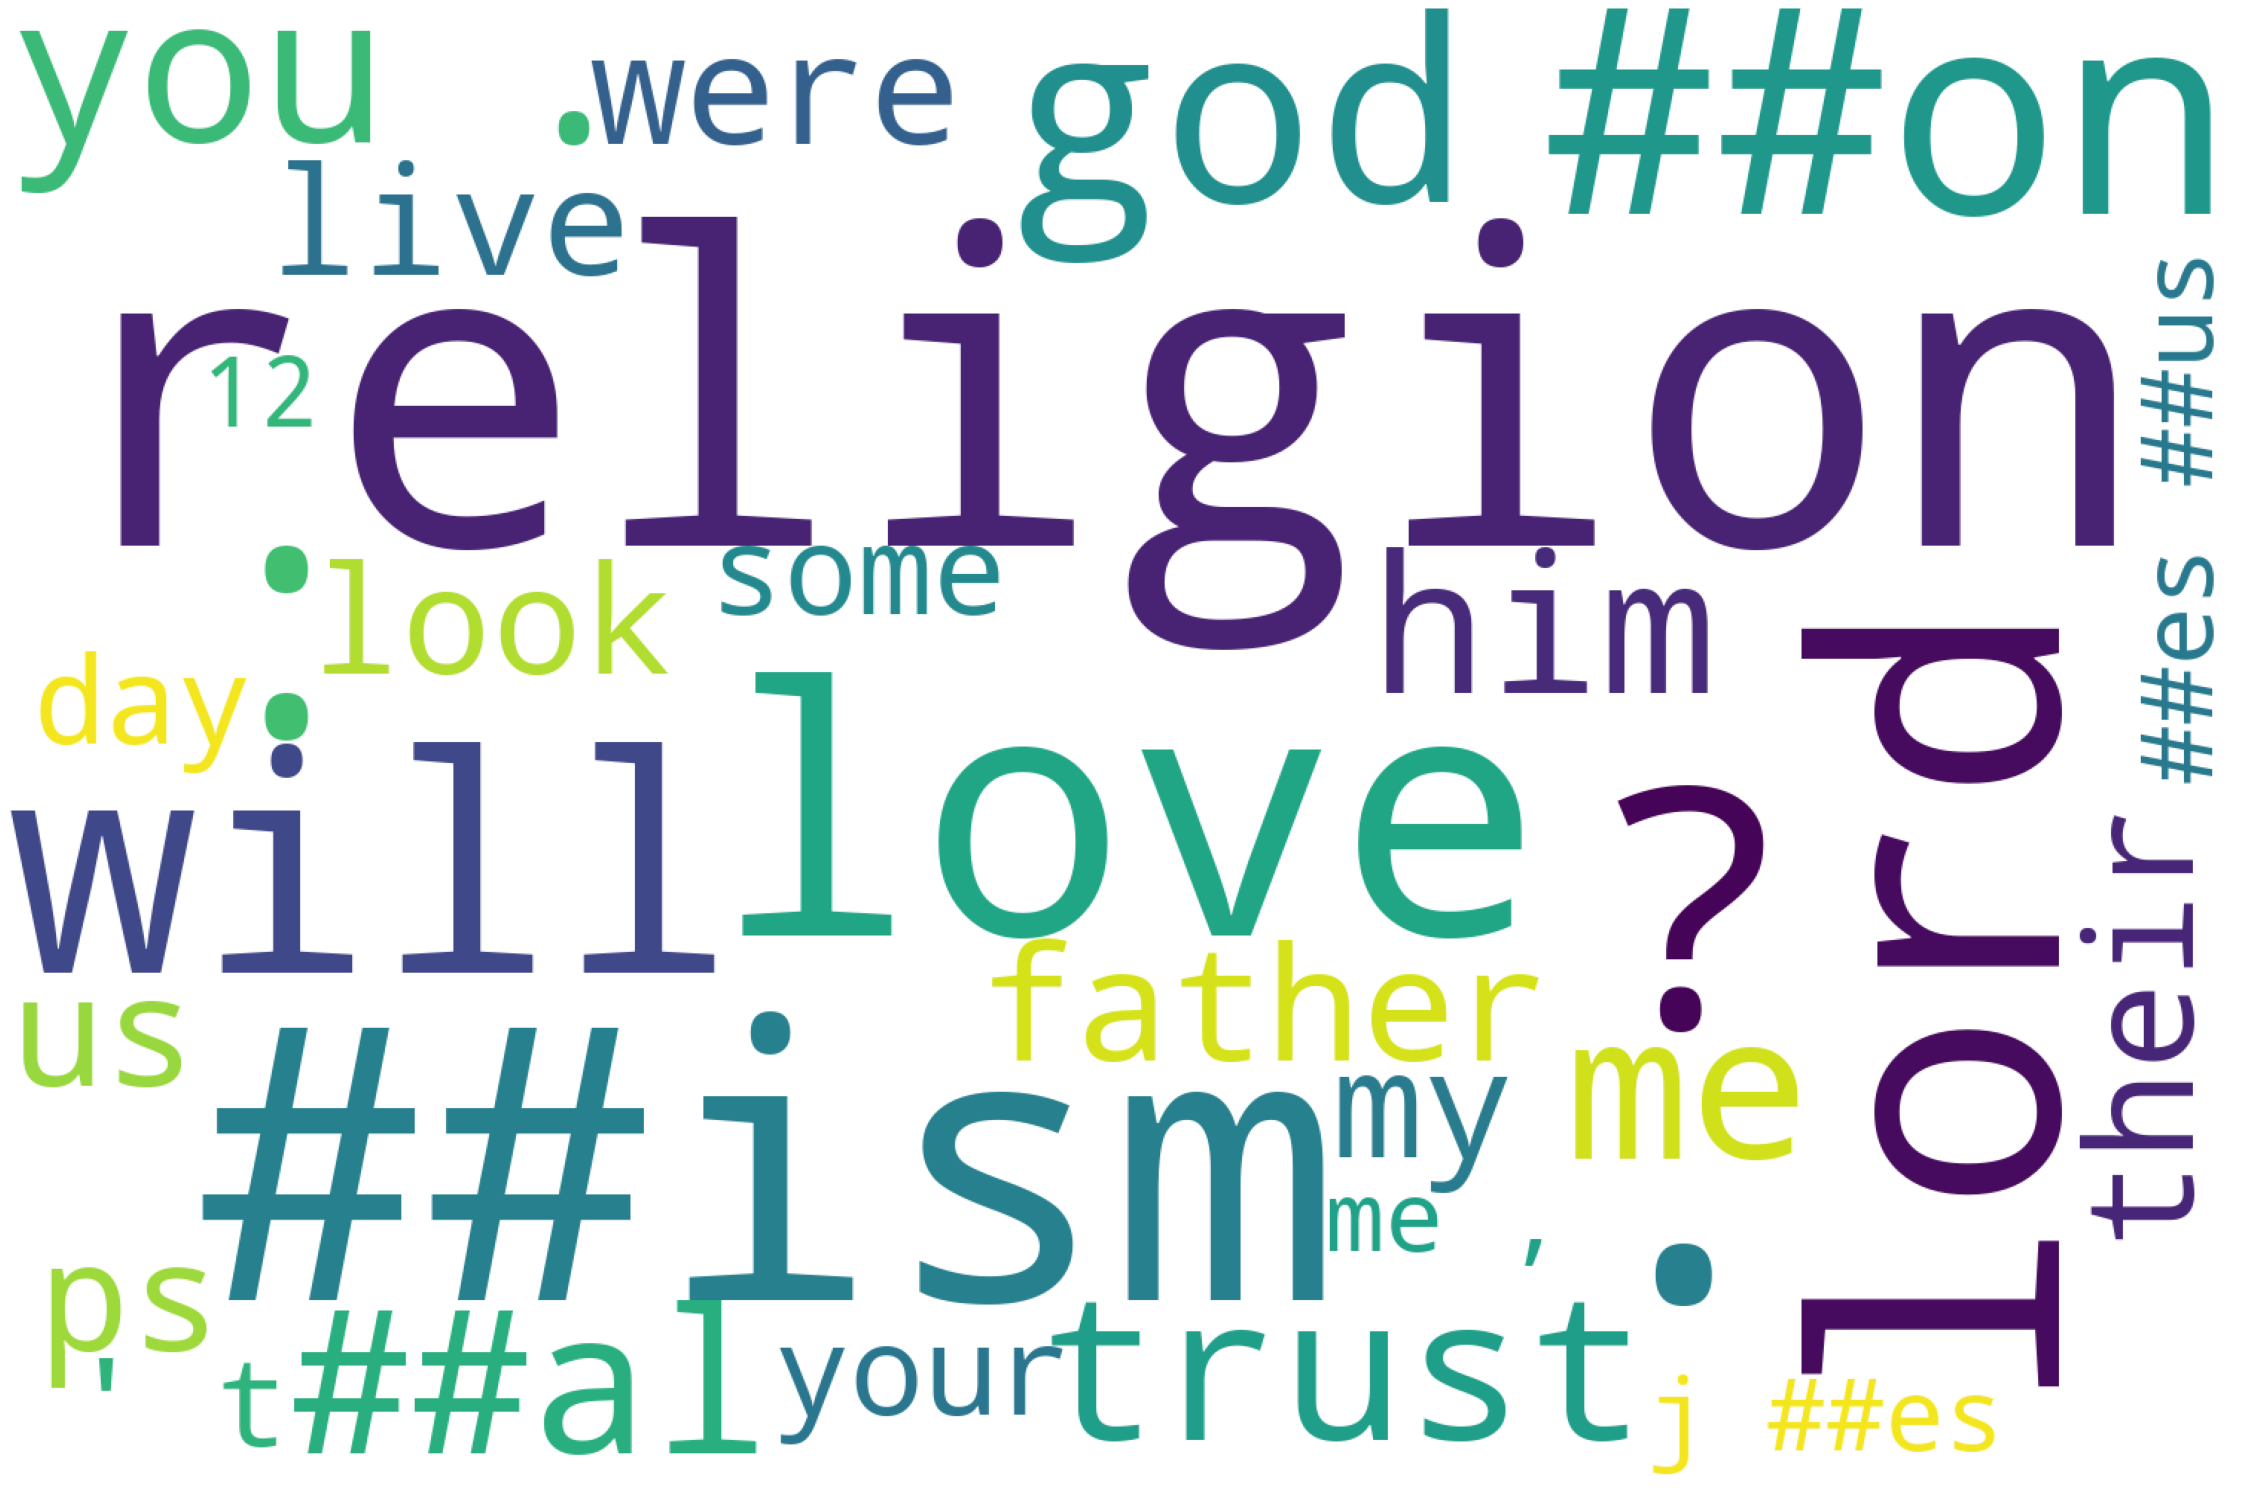

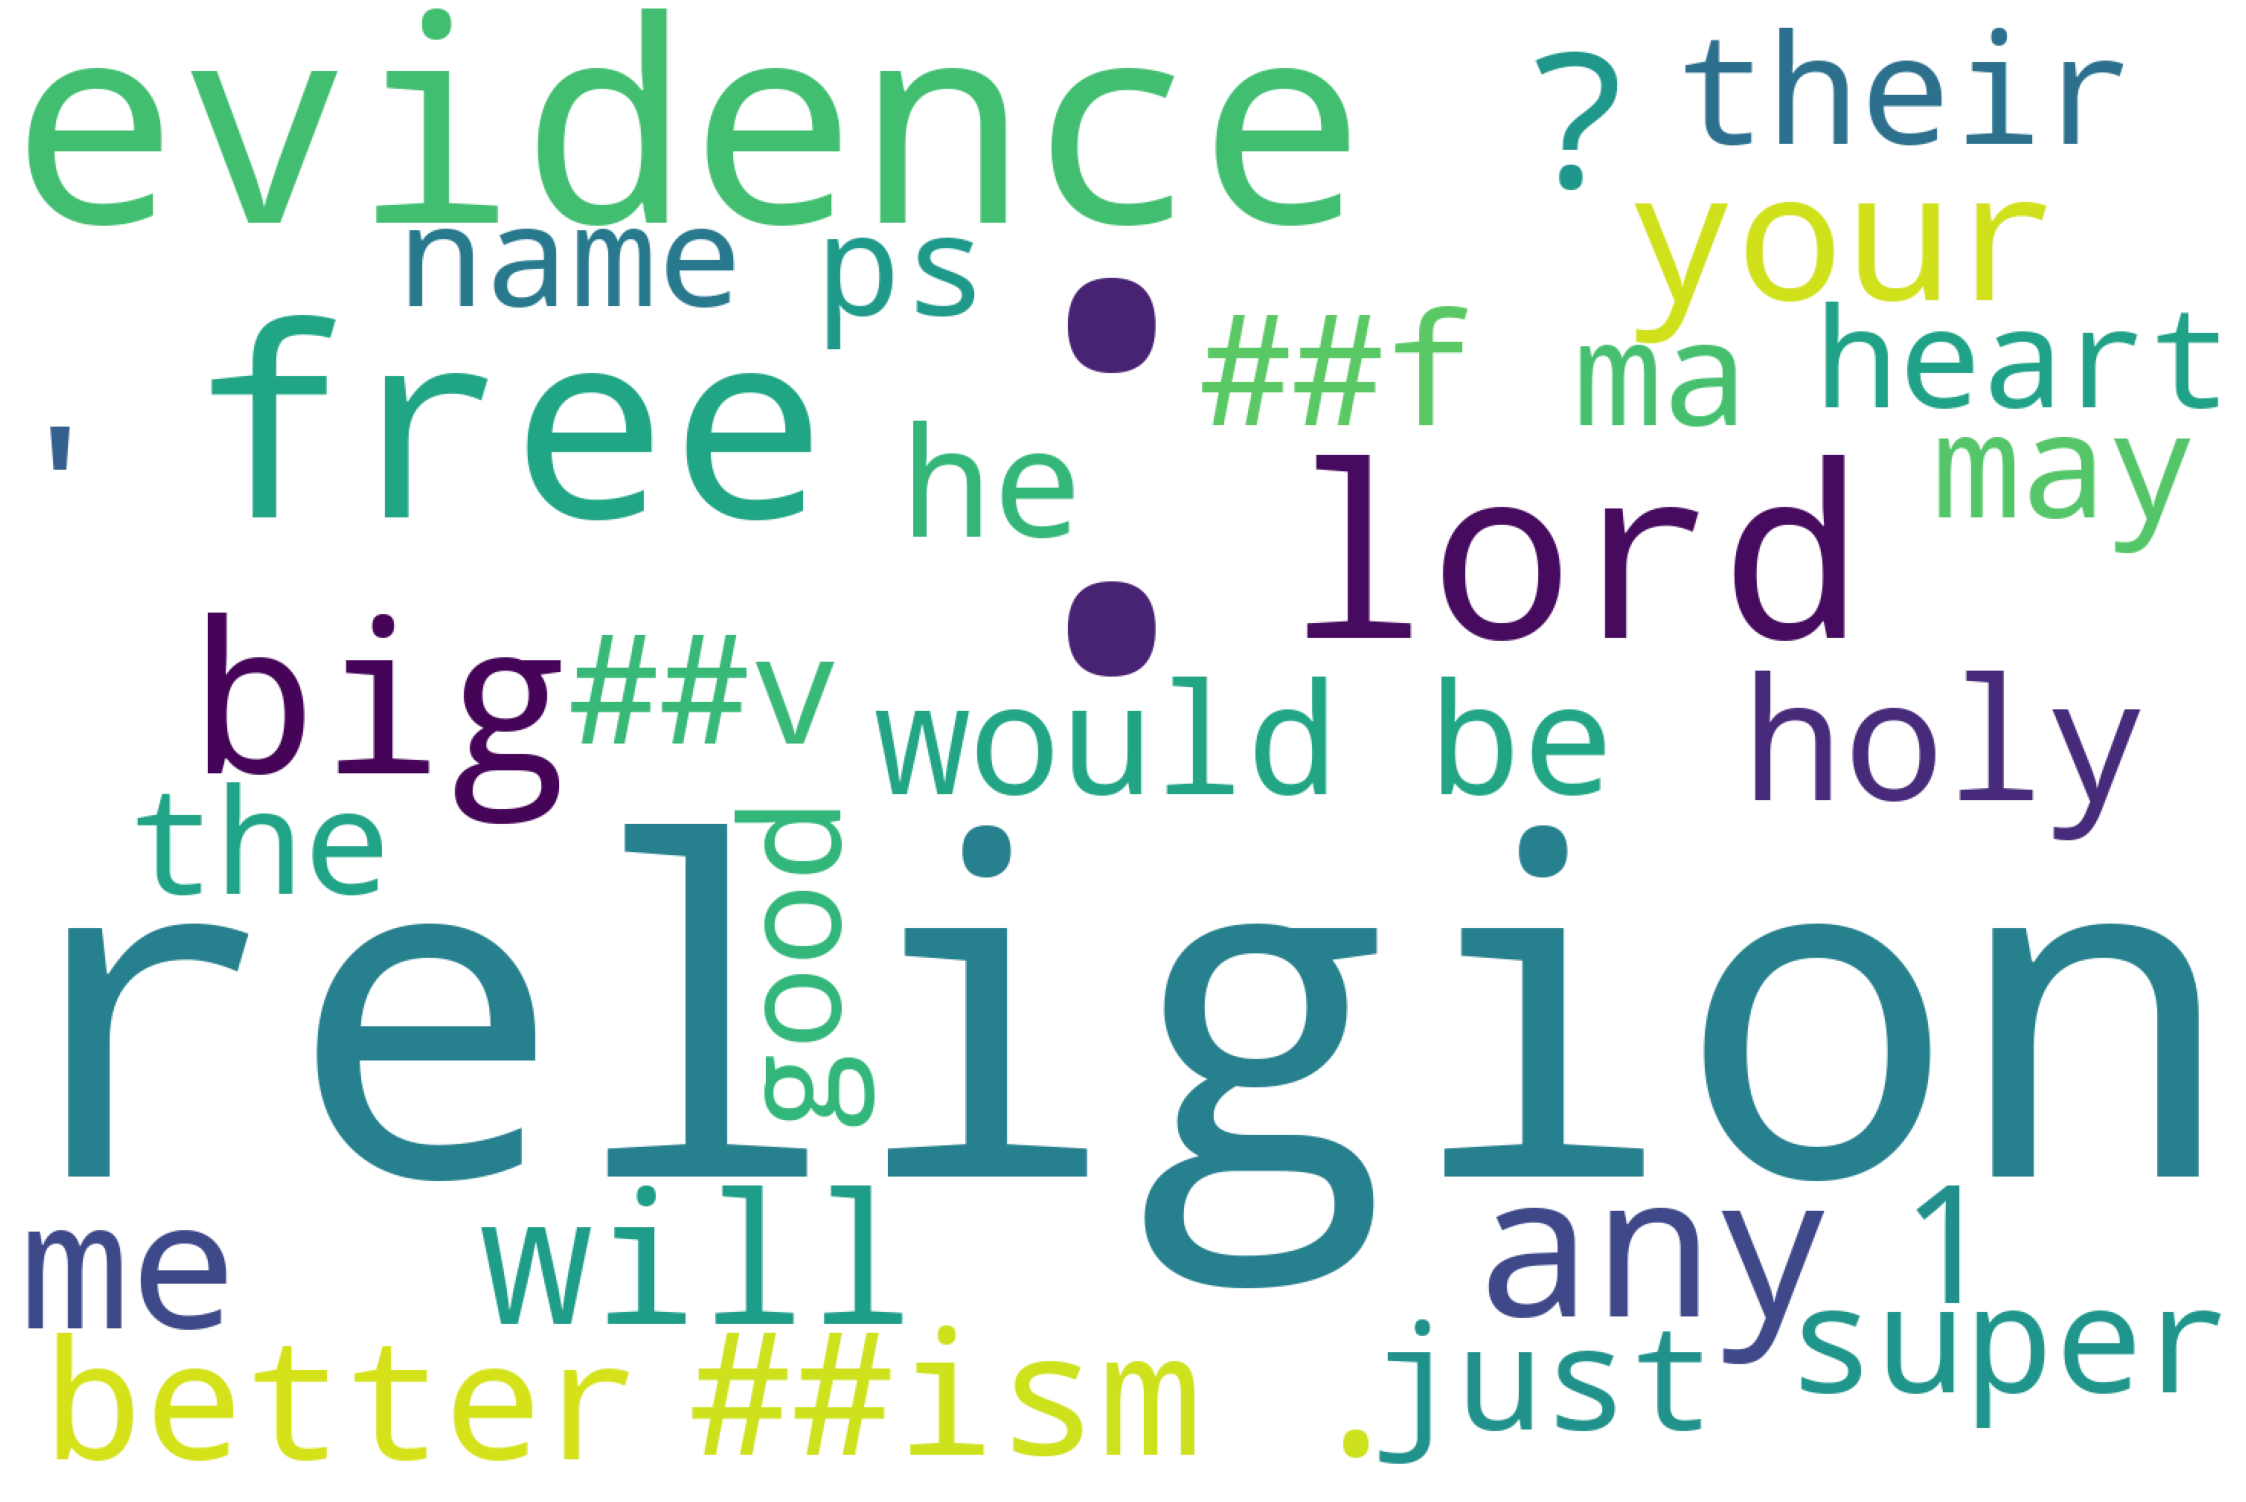

In [46]:
for path in paths:
    print(path)
    vis_word_cloud(base_path='data', path=path)
    vis_word_cloud(base_path='stancedata', path=path)

In [47]:
base_path = 'stancedata'
path='atheism_to_feminist'
full_path = f'{base_path}/pivots/{path}/100_bi_raw.tsv'
pivots_df = pd.read_csv(full_path, sep='\t')
pivots_df = pivots_df[['name', 'MI']]#
pivots_df.set_index('name', inplace=True)
pivots_dict_stance = pivots_df.to_dict()

base_path = 'data'
full_path = f'{base_path}/pivots/{path}/100_bi_raw.tsv'
pivots_df = pd.read_csv(full_path, sep='\t')
pivots_df = pivots_df[['name', 'MI']]#
pivots_df.set_index('name', inplace=True)
pivots_dict_sent = pivots_df.to_dict()

In [50]:
pivots_dict_sent['MI'].keys()

dict_keys(['religion', '##ism .', ':', 'love', 'lord', '?', 'will', '##on', 'god', 'you .', 'me', 'trust', '##al', 'him', 'father', 'were', 'us', 'ps', 'my', 'look', 'live', 'their', 'your', 'some', 'day', "' t", 'j ##es', '##es ##us', 'me ,', '12', '##day', 'u', 'fuck', 't', "'", 'heart', 'give', 'will be', '6', 'in a', "can '", 'believe in', '##ry', 'where', 'd', '##st', 'not', 'think', 'g', 'any', '##l', 'of all', 'days', 'by the', 'bring', 'and a', ', that', '##ws', 'too', 'evidence', 'age', '. we', '##sm', '##f', ';', 'super', 'made', 'face', '!', 'you to', 'that we', 'sun', 'strong', 'strength', 'loves', 'hand', 'forward', 'c', 'beautiful', 'amazing', '15', '. (', 'at the', '##m', 'he', 'could', 'against', 'life', 'the', 'today', 'holy', 'you', 'his', 'years', 'oh', 'of a', 'ignorance', 'going to', "doesn '", 'doesn'])

In [62]:
sta = list(pivots_dict_stance['MI'].keys())
sta[:30]

sent = list(pivots_dict_sent['MI'].keys())
sent[:30]

['religion',
 '##ism .',
 ':',
 'love',
 'lord',
 '?',
 'will',
 '##on',
 'god',
 'you .',
 'me',
 'trust',
 '##al',
 'him',
 'father',
 'were',
 'us',
 'ps',
 'my',
 'look',
 'live',
 'their',
 'your',
 'some',
 'day',
 "' t",
 'j ##es',
 '##es ##us',
 'me ,',
 '12']

In [63]:
len(set(sta[:30]).intersection(set(sent[:30])))

10

In [4]:
import seaborn as sns


In [15]:
num_records = {'Abortion': 933,
               'Atheism': 733,

               'Climate Change': 564,
                          'Feminism': 949,
               'Hillary': 984,
                          'Trump': 707,

                          }
nr = pd.DataFrame(num_records.values(), index=num_records.keys())




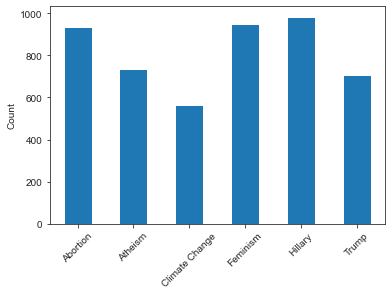

In [16]:
sns.set_style("ticks")
nr.plot.bar(rot=45, legend=False, ylabel='Count')#, title='Number of Instances per Domain')
plt.savefig('Number of Instances per Domain.png', bbox_inches='tight')

plt.show()

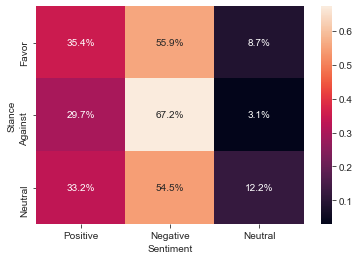

In [12]:
proportions = pd.DataFrame([[0.3538,0.5591,0.087],[0.2967,0.6725,0.0308],[0.3323,0.5452,0.1225]],
                           columns=['Positive','Negative','Neutral'],
                           index=['Favor','Against','Neutral'])
sns.heatmap(proportions, annot=True, fmt=".1%")
plt.xlabel('Sentiment')
plt.ylabel('Stance')
# plt.title('Percentage of Instances per Stance Label, by Sentiment Label')
plt.savefig('Percentage of Instances per Stance_by_Sentiment.png', bbox_inches='tight')
plt.show()
